<a href="https://colab.research.google.com/github/kurasaiteja/Whatsapp-Analysis/blob/master/Whatsapp_Group_Chat_Analysis_for_Android.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Whatsapp Group Chat Data Analysis using python.

Hey there! This a project which would keep evolving with time.

A typical data science project would involve 5 steps. The first step is Data Collection. In this case Data collection involves

Opening Whatsapp group chat.
Go to Settings.
Click on Export Chat.
Click on without media.

In [1]:
pip install emoji

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [1]:
import re
import regex
import pandas as pd
import numpy as np
import emoji
import plotly.express as px
from collections import Counter
import matplotlib.pyplot as plt
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# **Data Preparation:**


This plain text file will have to be parsed and tokenized in a meaningful manner in order to be served (stored) in a Pandas dataframe.

Let us consider just a single line from the text (which we will call “raw text”) and see how we can extract relevant columns from it:

18/06/17, 9:47 PM - Teja: Why do you have 2 numbers?

In our sample line of text, our main objective is to automatically break down the raw message into 4 tokens.

{Date}, {Time} - {Author}: {Message}

{18/06/17}, {9:47 PM} - {Teja}: {Why do you have 2 numbers?}






In [2]:
def startsWithDateAndTime(s):
    pattern = '(\d{2}\/\d{2}\/\d{4}) (\d{2}:\d{2}) - (.*?): (.*)' 
    result = re.match(pattern, s)
    if result:
        return True
    return False

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\JMarqu03\AppData\Local\Temp\ipykernel_23936\1273803796.py:2: SyntaxWarning: invalid escape sequence '\d'
  pattern = '(\d{2}\/\d{2}\/\d{4}) (\d{2}:\d{2}) - (.*?): (.*)'


In [3]:
startsWithDateAndTime('06/12/2024 18:30 - Foglia: Machine learning pai')

True

In [6]:
# def FindAuthor(s):
#     patterns = [
#         '([\w]+):',                        # First Name
#         '([\w]+[\s]+[\w]+):',              # First Name + Last Name
#         '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
#         '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India)
#         '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US)
#         '([\w]+)[\u263a-\U0001f999]+:',    # Name and Emoji              
#     ]
#     pattern = '^' + '|'.join(patterns)
#     result = re.match(pattern, s)
#     if result:
#         return True
#     return False

In [4]:
def FindAuthor(s):
  s=s.split(":")
  if len(s)==2:
    return True
  else:
    return False

In [5]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(' ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message): 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    return date, time, author, message


In [6]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
conversationPath = 'Conversa Crazys.txt' 
with open(conversationPath, encoding="utf-8") as fp:
    fp.readline() # Skipping first line of the file because contains information related to something about end-to-end encryption
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)

In [7]:
df = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\JMarqu03\AppData\Local\Temp\ipykernel_23936\2253017032.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [8]:
df

,Date,Time,Author,Message
0,2018-11-27,22:25,Amor ♥️🦞,nossa KKKK muito
1,2018-11-27,22:26,Karina,Saudades hauahauaha
2,2018-11-27,22:26,Karina,Tinha até massagem na mão
3,2018-11-27,22:27,Mari,😂😂😂
4,2018-11-27,22:27,Mari,O povo brigava !!
...,...,...,...,...
94321,2024-12-11,19:14,None,João Antonio: ENQUETE: Vou beber isso de desti...
94322,2024-12-11,19:14,João Antonio,Não incluí o shot pq mais de uma garrafa é lou...
94323,2024-12-11,19:19,Colms,Complicado
94324,2024-12-11,19:20,Colms,"Se tiver todas as opções, vão todas KKKKKKK"


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94326 entries, 0 to 94325
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     94326 non-null  datetime64[ns]
 1   Time     94326 non-null  object        
 2   Author   93068 non-null  object        
 3   Message  94326 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 2.9+ MB


## Printing Participants

In [10]:
df.Author.unique()

array(['Amor ♥️🦞', 'Karina', 'Mari', 'Colms', 'Foglia', 'João Antonio',
       None, '\u200eColms mudou o nome do grupo de "Mais que amigos',
       '\u200eKarina mudou o nome do grupo de "Angry Crazys" para "Angry Crazys',
       '\u200eAmor ♥️🦞 mudou o nome do grupo de "Angry Crazys', 'Brian',
       '\u200eColms mudou o nome do grupo de "Angry Crazys 🤪🤝🤰🏻" para "Mais que amigos',
       'Victoria Bravo', 'Zuppo', 'Meta AI'], dtype=object)

**None** which is the first element in array indicates few messages which do not have authors like,


*   Group was created.
*   Teja was added and so on.



Let us remove the messages created by None

In [11]:
df = df.dropna()
df = df[df['Author'].apply(lambda x: len(x) <= 15)]
df = df[df['Author'].apply(lambda x: x != "Meta AI")]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93058 entries, 0 to 94325
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     93058 non-null  datetime64[ns]
 1   Time     93058 non-null  object        
 2   Author   93058 non-null  object        
 3   Message  93058 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.5+ MB


In [12]:
df.Author.unique()

array(['Amor ♥️🦞', 'Karina', 'Mari', 'Colms', 'Foglia', 'João Antonio',
       'Brian', 'Victoria Bravo', 'Zuppo'], dtype=object)

We successfully removed None author.

# Group Wise Stats.

In [13]:
total_messages = df.shape[0]
print(total_messages)

93058


Let us now find out the total Media Messages

In [14]:
media_messages = df[df['Message'] == '<Mídia oculta>'].shape[0]
print(media_messages)

7944


In [119]:
pip install emoji.EMOJI_DATA

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement emoji.EMOJI_DATA (from versions: none)
ERROR: No matching distribution found for emoji.EMOJI_DATA


In [15]:
def split_count(text):

    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.EMOJI_DATA for char in word):
            emoji_list.append(word)

    return emoji_list

df["emoji"] = df["Message"].apply(split_count)

In [16]:
emojis = sum(df['emoji'].str.len())
print(emojis)

7072


In [17]:
URLPATTERN = r'(https?://\S+)'
df['urlcount'] = df.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()


In [18]:
links = np.sum(df.urlcount)

In [19]:
print("Group Wise Stats")
print("Messages:",total_messages)
print("Media:",media_messages)
#print("Emojis:",emojis)
print("Links:",links)

Group Wise Stats
Messages: 93058
Media: 7944
Links: 45


## Let us Separate the media messages and text messages

In [20]:
media_messages_df = df[df['Message'] == '<Mídia oculta>']

In [21]:
media_messages_df

,Date,Time,Author,Message,emoji,urlcount
17,2018-12-02,17:08,Karina,<Mídia oculta>,[],0
41,2018-12-05,14:36,Colms,<Mídia oculta>,[],0
49,2018-12-05,14:43,Amor ♥️🦞,<Mídia oculta>,[],0
51,2018-12-05,14:45,Colms,<Mídia oculta>,[],0
66,2018-12-08,20:37,Colms,<Mídia oculta>,[],0
...,...,...,...,...,...,...
94247,2024-12-10,16:57,Colms,<Mídia oculta>,[],0
94261,2024-12-11,17:22,Zuppo,<Mídia oculta>,[],0
94266,2024-12-11,17:24,João Antonio,<Mídia oculta>,[],0
94283,2024-12-11,17:28,Foglia,<Mídia oculta>,[],0


In [22]:
messages_df = df.drop(media_messages_df.index)

In [23]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85114 entries, 0 to 94325
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      85114 non-null  datetime64[ns]
 1   Time      85114 non-null  object        
 2   Author    85114 non-null  object        
 3   Message   85114 non-null  object        
 4   emoji     85114 non-null  object        
 5   urlcount  85114 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


It might be interesting to count the number of letters and words used by each author in each message. So, let us add 2 new columns to the data frame called “Letter_Count” and “Word_Count”, using the following code:

In [24]:
messages_df['Letter_Count'] = messages_df['Message'].apply(lambda s : len(s))
messages_df['Word_Count'] = messages_df['Message'].apply(lambda s : len(s.split(' ')))
messages_df["MessageCount"]=1

In [25]:
messages_df.head(2)

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount
0,2018-11-27,22:25,Amor ♥️🦞,nossa KKKK muito,[],0,16,3,1
1,2018-11-27,22:26,Karina,Saudades hauahauaha,[],0,19,2,1


In [27]:
messages_df["emojicount"]= df['emoji'].str.len()

In [28]:
messages_df['Word_Count'].sum()

np.int64(435116)

#Author wise stats

In [29]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df= messages_df[messages_df["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'Stats of {l[i]} -')
  # shape will print number of rows which indirectly means the number of messages
  print('Messages Sent', req_df.shape[0])
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word_Count']))/req_df.shape[0]
  print('Words per message', words_per_message)
  #media conists of media messages
  media = media_messages_df[media_messages_df['Author'] == l[i]].shape[0]
  print('Media Messages Sent', media)
  # emojis conists of total emojis
  emojis = sum(req_df['emoji'].str.len())
  print('Emojis Sent', emojis)
  #links consist of total links
  links = sum(req_df["urlcount"])   
  print('Links Sent', links)   
  print()

Stats of Amor ♥️🦞 -
Messages Sent 7662
Words per message 4.096580527277474
Media Messages Sent 1296
Emojis Sent 402
Links Sent 7

Stats of Karina -
Messages Sent 14142
Words per message 5.441097440248904
Media Messages Sent 1425
Emojis Sent 1139
Links Sent 6

Stats of Mari -
Messages Sent 8396
Words per message 4.879466412577417
Media Messages Sent 807
Emojis Sent 1185
Links Sent 1

Stats of Colms -
Messages Sent 24884
Words per message 4.647846005465359
Media Messages Sent 2273
Emojis Sent 2202
Links Sent 14

Stats of Foglia -
Messages Sent 16772
Words per message 5.715120438826616
Media Messages Sent 906
Emojis Sent 269
Links Sent 7

Stats of João Antonio -
Messages Sent 12967
Words per message 5.576771805352047
Media Messages Sent 1214
Emojis Sent 1854
Links Sent 10

Stats of Brian -
Messages Sent 135
Words per message 6.785185185185185
Media Messages Sent 2
Emojis Sent 9
Links Sent 0

Stats of Victoria Bravo -
Messages Sent 134
Words per message 7.223880597014926
Media Messages Sen

# Most used Emoji in Group

# Emoji Stats

### Unique emojis used in group

In [28]:
total_emojis_list = list(set([a for b in messages_df.emoji for a in b]))
total_emojis = len(total_emojis_list)
print(total_emojis)

436


### Most used emoji

In [31]:
total_emojis_list = list([a for b in messages_df.emoji for a in b])
emoji_dict = dict(Counter(total_emojis_list))
emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
print(emoji_dict)

[('😂', 911), ('😭', 558), ('😔', 441), ('❤️', 293), ('🥺', 241), ('♥️', 176), ('❤', 168), ('🥰', 129), ('👏', 125), ('👀', 123), ('🙏🏼', 115), ('😱', 111), ('😳', 111), ('🤩', 92), ('🙏', 92), ('🤔', 84), ('🙏🏻', 76), ('😎', 75), ('👏🏼', 74), ('😡', 71), ('😞', 70), ('😬', 70), ('😋', 68), ('😍', 60), ('🥵', 60), ('🤡', 57), ('🥴', 55), ('🙄', 53), ('🤪', 53), ('♥', 50), ('🥹', 47), ('😏', 45), ('✅', 44), ('🥲', 43), ('🤝', 42), ('🤦🏻\u200d♀️', 42), ('🌕', 42), ('🥳', 40), ('💛', 40), ('🌑', 40), ('🙌🏻', 36), ('🤭', 36), ('🌚', 35), ('🐦', 35), ('🤢', 34), ('🥇', 33), ('🙃', 30), ('👍', 29), ('✨', 27), ('💚', 27), ('🎉', 26), ('😠', 25), ('💕', 25), ('👍🏼', 23), ('🤤', 23), ('👺', 23), ('😢', 22), ('👌🏼', 21), ('🙌', 19), ('😪', 19), ('🤏', 19), ('🚨', 19), ('✌️', 19), ('😩', 18), ('😉', 18), ('👏🏻', 18), ('💙', 18), ('🤑', 18), ('🤌🏻', 18), ('😁', 17), ('😓', 16), ('😘', 15), ('🤷🏻\u200d♀️', 15), ('🫶🏻', 15), ('💸', 14), ('☹️', 14), ('👁️', 14), ('🤬', 13), ('🗣️', 13), ('😀', 12), ('🍕', 12), ('👼🏼', 12), ('🕯️', 12), ('😯', 11), ('😲', 11), ('☝️', 11), ('🌝'

In [32]:
emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
emoji_df

,emoji,count
0,😂,911
1,😭,558
2,😔,441
3,❤️,293
4,🥺,241
...,...,...
431,😄,1
432,🧠,1
433,Ⓜ️,1
434,📝,1


We can see '😂 '   dominates the list.

### Emoji distribution visualisation

In [92]:
pip install nbformat --upgrade nbformat

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [33]:
import plotly.express as px
fig = px.pie(emoji_df, values='count', names='emoji')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

### Person Wise Emoji Distribution

In [142]:
# Creates a list of unique Authors - ['Manikanta', 'Teja Kura', .........]
l = messages_df.Author.unique()
for i in range(len(l)):
  dummy_df = messages_df[messages_df['Author'] == l[i]]
  total_emojis_list = list([a for b in dummy_df.emoji for a in b])
  emoji_dict = dict(Counter(total_emojis_list))
  emoji_dict = sorted(emoji_dict.items(), key=lambda x: x[1], reverse=True)
  print('Emoji Distribution for', l[i])
  author_emoji_df = pd.DataFrame(emoji_dict, columns=['emoji', 'count'])
  fig = px.pie(author_emoji_df, values='count', names='emoji')
  fig.update_traces(textposition='inside', textinfo='percent+label')
  fig.show()

Emoji Distribution for Amor ♥️🦞


Emoji Distribution for Karina


Emoji Distribution for Mari


Emoji Distribution for Colms


Emoji Distribution for Foglia


Emoji Distribution for João Antonio


Emoji Distribution for Brian


Emoji Distribution for Victoria Bravo


Emoji Distribution for Zuppo


# Some more Stats

### **Day wise Distribution**

In [34]:
def f(i):
  l = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
  return l[i];
day_df=pd.DataFrame(messages_df["Message"])
day_df['day_of_date'] = messages_df['Date'].dt.weekday
day_df['day_of_date'] = day_df["day_of_date"].apply(f)
day_df["messagecount"] = 1
day = day_df.groupby("day_of_date").sum()
day.reset_index(inplace=True)

In [35]:
fig = px.line_polar(day, r='messagecount', theta='day_of_date', line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
    )),
  showlegend=False
)
fig.show()

### **Number of messages as times move on**

In [29]:
date_df = messages_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
fig = px.line(date_df, x="Date", y="MessageCount")
fig.update_xaxes(nticks=20)
fig.show()

In [30]:
date_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount,emojicount
0,2018-11-27,22:2522:2622:2622:2722:2722:2722:28,Amor ♥️🦞KarinaKarinaMariMariColmsColms,nossa KKKK muitoSaudades hauahauahaTinha até m...,"[😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂]",0,173,31,7,16
1,2018-11-30,17:1817:2117:2117:2717:2717:2717:2817:3217:382...,Amor ♥️🦞ColmsColmsFogliaJoão AntonioKarinaAmor...,ja estão de férias migles?NemSó semana que vem...,[🌝],0,161,36,10,1
2,2018-12-02,17:0817:2017:4619:2419:2420:4422:27,Amor ♥️🦞MariFogliaColmsColmsKarinaColms,KKKKKKKKkkkkkQue menino humilde😂😂😂😂😂😂😂😂😂Chama ...,"[😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂, 😂]",0,66,12,7,9
3,2018-12-05,14:1114:1114:1114:1114:1214:1214:1214:1814:181...,ColmsColmsFogliaFogliaColmsColmsColmsMariMariJ...,E aquele grupo topperson.*?Pensei a msm coisaK...,"[😂, 😂, 😂, 😂]",0,476,92,25,4
4,2018-12-07,12:3712:3712:3812:3812:3812:3812:3812:4112:411...,ColmsColmsFogliaFogliaColmsColmsColmsAmor ♥️🦞A...,"Fala, crazysQuem aí já viu o trailer de Vingad...",[],0,201,43,13,0
...,...,...,...,...,...,...,...,...,...,...
1431,2024-12-05,13:1013:1513:5013:5013:5014:0414:0414:0414:041...,Victoria BravoAmor ♥️🦞FogliaFogliaFogliaVictor...,cheguei no escritório hj e vi uma cara parecid...,"[😎, 😭, 😭, 🤮, 😱]",0,1091,224,33,5
1432,2024-12-06,18:1518:2018:2118:2118:2118:2218:2218:2218:221...,João AntonioJoão AntonioMariColmsColmsJoão Ant...,Hot dog cês topam?@13135550002 me dê uma lista...,"[👀, 😭, 😠]",0,3021,562,86,3
1433,2024-12-09,14:5614:5614:5614:5615:4215:4320:2420:2820:282...,ColmsColmsColmsColmsColmsJoão AntonioJoão Anto...,GenteO nome do cliente aquiPipiCruelMARIANA KK...,[],0,350,56,18,0
1434,2024-12-10,14:0114:0114:0314:0414:1614:2214:2314:2314:231...,Amor ♥️🦞Amor ♥️🦞ColmsAmor ♥️🦞ColmsColmsColmsCo...,sou vegetarianasiiiiiiiiSaia do grupo5kg de ab...,[🙏],0,4272,821,126,1


In [48]:
date_df = messages_df[messages_df['Message'].str.contains('gaio', case=False, na=False)]
date_df = date_df.groupby("Date").sum()
date_df.reset_index(inplace=True)
#print(date_df.head(10))
fig = px.bar(date_df, x="Date", y="MessageCount")
fig.show()

In [187]:
# Criando a linha do gráfico
fig = px.line(date_df, x="Date", y="MessageCount")

# Adicionando linhas verticais pontilhadas no primeiro dia de cada ano
first_days_of_year = date_df['Date'].dt.to_period('Y').drop_duplicates().dt.to_timestamp()

for day in first_days_of_year:
    fig.add_vline(x=day, line=dict(dash='dot', color='grey'))

# Atualizando o eixo X para mostrar 20 ticks
fig.update_xaxes(nticks=20)

# Mostrando o gráfico
fig.show()

In [41]:
date_df["rolling"] = date_df["MessageCount"].rolling(30).mean()
fig = px.line(date_df, x="Date", y="rolling")
fig.update_xaxes(nticks=20)
fig.show()

### **Chatter**

In [48]:
messages_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount,emojicount
0,2018-11-27,22:25,Amor ♥️🦞,nossa KKKK muito,[],0,16,3,1,0
1,2018-11-27,22:26,Karina,Saudades hauahauaha,[],0,19,2,1,0
2,2018-11-27,22:26,Karina,Tinha até massagem na mão,[],0,25,5,1,0
3,2018-11-27,22:27,Mari,😂😂😂,"[😂, 😂, 😂]",0,3,1,1,3
4,2018-11-27,22:27,Mari,O povo brigava !!,[],0,17,4,1,0
...,...,...,...,...,...,...,...,...,...,...
94320,2024-12-11,19:13,João Antonio,Pra eu ter noção de quantidade aqui,[],0,35,7,1,0
94322,2024-12-11,19:14,João Antonio,Não incluí o shot pq mais de uma garrafa é lou...,[],0,50,11,1,0
94323,2024-12-11,19:19,Colms,Complicado,[],0,10,1,1,0
94324,2024-12-11,19:20,Colms,"Se tiver todas as opções, vão todas KKKKKKK",[],0,43,8,1,0


In [50]:
#auth = messages_df.groupby("Author").sum()
numeric_columns = messages_df.select_dtypes(include=[np.number])
numeric_columns['Author'] = messages_df['Author']
auth = numeric_columns.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

In [257]:
palavra_df = messages_df[messages_df['Message'].str.contains('covid', case=False, na=False)]
numeric_columns = palavra_df.select_dtypes(include=[np.number])
numeric_columns['Author'] = palavra_df['Author']
auth = numeric_columns.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

### **When are the group members most active?**

Text(0, 0.5, 'Time')

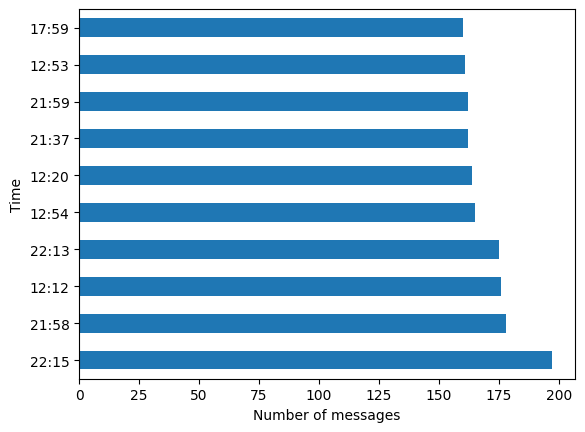

In [51]:
messages_df['Time'].value_counts().head(10).plot.barh() # Top 10 Times of the day at which the most number of messages were sent
plt.xlabel('Number of messages')
plt.ylabel('Time')

### **The most happening day was -**

Date
2021-01-03    662
2020-06-04    633
2022-08-22    618
2023-08-15    543
2020-11-06    506
             ... 
2022-06-06      1
2021-09-19      1
2020-08-27      1
2018-12-19      1
2024-10-22      1
Name: count, Length: 1448, dtype: int64


Text(0, 0.5, 'Date')

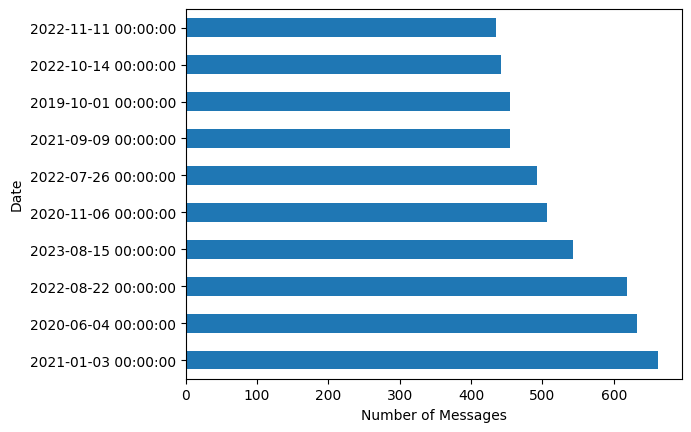

In [52]:
messages_df['Date'].value_counts().head(10).plot.barh()
print(messages_df['Date'].value_counts())
plt.xlabel('Number of Messages')
plt.ylabel('Date')

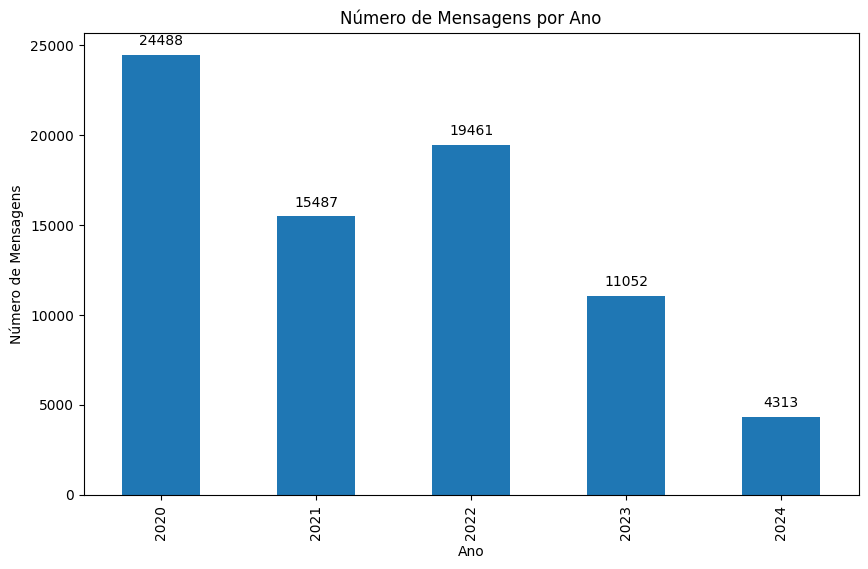

In [31]:
import matplotlib.pyplot as plt

# Supondo que 'messages_df' é o seu DataFrame e 'Date' está no formato de string
# Primeiro, converta a coluna 'Date' para datetime
messages_df['Date'] = pd.to_datetime(messages_df['Date'])

# Extraia o ano da coluna 'Date'
messages_df['Year'] = messages_df['Date'].dt.year

# Filtre os anos 2018 e 2019
filtered_messages_df = messages_df[~messages_df['Year'].isin([2018, 2019])]

# Conte o número de mensagens por ano
messages_per_year = filtered_messages_df['Year'].value_counts().sort_index()

# Plote os dados
ax = messages_per_year.plot(kind='bar', figsize=(10, 6))

# Adicione data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xlabel('Ano')
plt.ylabel('Número de Mensagens')
plt.title('Número de Mensagens por Ano')
plt.show()

In [32]:
messages_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount,emojicount,Year
0,2018-11-27,22:25,Amor ♥️🦞,nossa KKKK muito,[],0,16,3,1,0,2018
1,2018-11-27,22:26,Karina,Saudades hauahauaha,[],0,19,2,1,0,2018
2,2018-11-27,22:26,Karina,Tinha até massagem na mão,[],0,25,5,1,0,2018
3,2018-11-27,22:27,Mari,😂😂😂,"[😂, 😂, 😂]",0,3,1,1,3,2018
4,2018-11-27,22:27,Mari,O povo brigava !!,[],0,17,4,1,0,2018
...,...,...,...,...,...,...,...,...,...,...,...
94320,2024-12-11,19:13,João Antonio,Pra eu ter noção de quantidade aqui,[],0,35,7,1,0,2024
94322,2024-12-11,19:14,João Antonio,Não incluí o shot pq mais de uma garrafa é lou...,[],0,50,11,1,0,2024
94323,2024-12-11,19:19,Colms,Complicado,[],0,10,1,1,0,2024
94324,2024-12-11,19:20,Colms,"Se tiver todas as opções, vão todas KKKKKKK",[],0,43,8,1,0,2024


In [37]:
messages2024_df = messages_df[messages_df['Date']<="2024-06-01"]
messages2024_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount,emojicount,Year
0,2018-11-27,22:25,Amor ♥️🦞,nossa KKKK muito,[],0,16,3,1,0,2018
1,2018-11-27,22:26,Karina,Saudades hauahauaha,[],0,19,2,1,0,2018
2,2018-11-27,22:26,Karina,Tinha até massagem na mão,[],0,25,5,1,0,2018
3,2018-11-27,22:27,Mari,😂😂😂,"[😂, 😂, 😂]",0,3,1,1,3,2018
4,2018-11-27,22:27,Mari,O povo brigava !!,[],0,17,4,1,0,2018
...,...,...,...,...,...,...,...,...,...,...,...
91457,2024-05-29,09:44,Karina,Pqp kkkkkkkk,[],0,12,2,1,0,2024
91459,2024-05-29,14:40,Karina,Dentrooo,[],0,8,1,1,0,2024
91460,2024-05-29,14:43,Colms,Obaaaa,[],0,6,1,1,0,2024
91462,2024-05-30,22:14,Colms,Éramos tão jovens.,[],0,18,3,1,0,2024


In [38]:
numeric_columns = messages2024_df.select_dtypes(include=[np.number])
numeric_columns['Author'] = messages2024_df['Author']
auth = numeric_columns.groupby("Author").sum()
auth.reset_index(inplace=True)
fig = px.bar(auth, y="Author", x="MessageCount", color='Author', orientation="h",
             color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"],
             title="Explicit color sequence"
            )

fig.show()

In [43]:
karina_df = messages_df[messages_df['Author']=='Colms']
date_df = karina_df.groupby("Date").sum()
date_df.reset_index(inplace=True)

# Criando a linha do gráfico
fig = px.line(date_df, x="Date", y="MessageCount")

# Adicionando linhas verticais pontilhadas no primeiro dia de cada ano
first_days_of_year = date_df['Date'].dt.to_period('Y').drop_duplicates().dt.to_timestamp()

for day in first_days_of_year:
    fig.add_vline(x=day, line=dict(dash='dot', color='grey'))

# Atualizando o eixo X para mostrar 20 ticks
fig.update_xaxes(nticks=20)

# Mostrando o gráfico
fig.show()

### **Jogo de palavras por pessoas**

In [147]:
messages_df.Author.unique()

array(['Amor ♥️🦞', 'Karina', 'Mari', 'Colms', 'Foglia', 'João Antonio',
       'Brian', 'Victoria Bravo', 'Zuppo'], dtype=object)

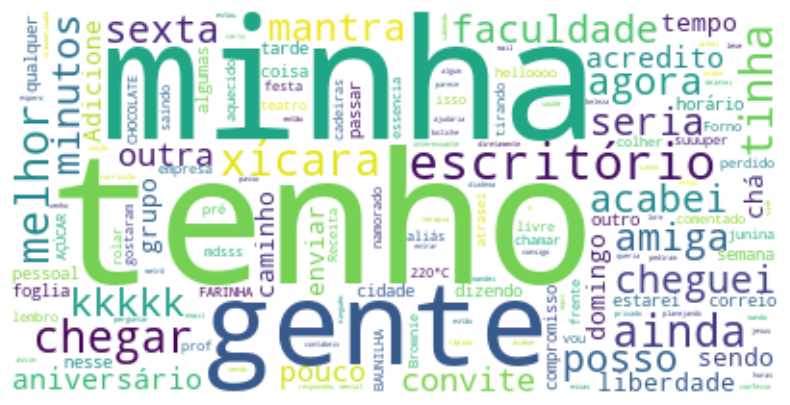

In [158]:
personwordcloud = messages_df[messages_df['Author'] == "Victoria Bravo"]

text = " ".join(review for review in personwordcloud.Message)
stopwords = set(STOPWORDS)
stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni", "mídia", "oculta"])

filtered_words = [word for word in text.split() if len(word) >= 5 and word.lower() not in stopwords]
filtered_text = " ".join(filtered_words)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(filtered_text)
# Display the generated image:
# the matplotlib way:
  
plt.figure( figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### **Message Having Maximum number of words**

In [53]:
messages_df.iloc[messages_df['Word_Count'].argmax()]

Date                                          2020-09-08 00:00:00
Time                                                        20:53
Author                                               João Antonio
Message         Aí gente, dando continuidade a essa ideia foda...
emoji                                                      [🥺, 😎]
urlcount                                                        0
Letter_Count                                                 1590
Word_Count                                                    285
MessageCount                                                    1
emojicount                                                      2
Name: 30202, dtype: object

### **Word Cloud**

In [188]:
text = " ".join(review for review in messages_df.Message)
print ("There are {} words in all the messages.".format(len(text)))

There are 2350369 words in all the messages.


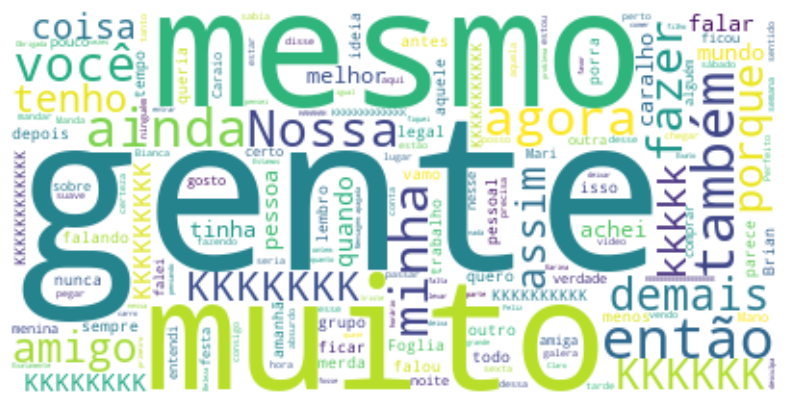

In [189]:
  stopwords = set(STOPWORDS)
  stopwords.update(["ra", "ga", "na", "ani", "em", "ki", "ah","ha","la","eh","ne","le","ni","lo","Ma","Haa","ni", "mídia", "oculta"])

  filtered_words = [word for word in text.split() if len(word) >= 5 and word.lower() not in stopwords]
  filtered_text = " ".join(filtered_words)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(filtered_text)
  # Display the generated image:
  # the matplotlib way:
  
  plt.figure( figsize=(10,5))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

**BoxPlots**

In [236]:
date_df = messages_df.groupby('Date').sum().reset_index()
date_df = date_df[date_df['Date']>='2021-01-01']
date_df['Ano'] = date_df['Year']/date_df['MessageCount']
date_df

,Date,Time,Author,Message,emoji,urlcount,Letter_Count,Word_Count,MessageCount,emojicount,Year,Ano
533,2021-01-01,00:0300:0300:0300:0400:0400:0400:0400:0800:081...,Amor ♥️🦞FogliaFogliaJoão AntonioColmsColmsJoão...,amo vcsFeliz anos novo meus lindosAmo vcsFELIZ...,[♥️],0,460,88,20,1,40420,2021.0
534,2021-01-02,14:3215:5215:5216:0716:0716:0716:1316:1316:131...,ColmsColmsColmsKarinaKarinaKarinaColmsColmsCol...,Poluiu os oceanosMigosVocês já compraram algo ...,"[🙏🏻, 🙃, 💅🏻, 😁, 🙏, 🙌]",0,1141,211,50,6,101050,2021.0
535,2021-01-03,15:3215:4315:4316:2816:2916:3117:0917:0917:091...,Amor ♥️🦞João AntonioJoão AntonioKarinaKarinaAm...,"@5511988629961 Ros, e quem concorda respiraA ú...","[😎, 👌, 🥵, 🔮, 😎, 😔, 🐸, 🥵, 🥵, 🥵, 🥵, 🥵]",0,13501,2353,656,12,1325776,2021.0
536,2021-01-04,13:3313:3313:3313:3613:3613:3713:3713:3713:371...,ColmsColmsColmsMariColmsMariColmsColmsMariColm...,Meu deusOutra relíquiaTem que emoldurar essas ...,"[😂, 😂, 😂]",0,302,54,15,3,30315,2021.0
537,2021-01-05,11:3011:4011:4013:1213:1218:1719:5920:0420:542...,FogliaColmsColmsFogliaFogliaKarinaMariJoão Ant...,"Bts é bom né?Coitado do Jimin, não merece uma ...",[😔],0,232,43,10,1,20210,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,2024-12-05,13:1013:1513:5013:5013:5014:0414:0414:0414:041...,Victoria BravoAmor ♥️🦞FogliaFogliaFogliaVictor...,cheguei no escritório hj e vi uma cara parecid...,"[😎, 😭, 😭, 🤮, 😱]",0,1091,224,33,5,66792,2024.0
1432,2024-12-06,18:1518:2018:2118:2118:2118:2218:2218:2218:221...,João AntonioJoão AntonioMariColmsColmsJoão Ant...,Hot dog cês topam?@13135550002 me dê uma lista...,"[👀, 😭, 😠]",0,3021,562,86,3,174064,2024.0
1433,2024-12-09,14:5614:5614:5614:5615:4215:4320:2420:2820:282...,ColmsColmsColmsColmsColmsJoão AntonioJoão Anto...,GenteO nome do cliente aquiPipiCruelMARIANA KK...,[],0,350,56,18,0,36432,2024.0
1434,2024-12-10,14:0114:0114:0314:0414:1614:2214:2314:2314:231...,Amor ♥️🦞Amor ♥️🦞ColmsAmor ♥️🦞ColmsColmsColmsCo...,sou vegetarianasiiiiiiiiSaia do grupo5kg de ab...,[🙏],0,4272,821,126,1,255024,2024.0


In [238]:
# Datas

fig = px.box(date_df, y='MessageCount', x= 'Ano' ,title='Mensagens por ano')
fig.show()

In [253]:
#Pessoas em 2024

# Datas
numeric_columns = messages_df.select_dtypes(include=[np.number])
numeric_columns['Author'] = messages_df['Author']
date_df = numeric_columns
date_df = date_df[date_df['Year']==2024]
date_df = date_df.groupby('Author').sum().reset_index()
date_df['Ano'] = date_df['Year']/date_df['MessageCount']
date_df

#fig = px.box(date_df, y='MessageCount', x= 'Author' ,title='Mensagens por ano por pessoa')
#fig.show()

,Author,urlcount,Letter_Count,Word_Count,MessageCount,emojicount,Year,Ano
0,Amor ♥️🦞,0,12005,2279,496,27,1003904,2024.0
1,Brian,0,1652,313,45,3,91080,2024.0
2,Colms,0,28880,5463,1022,84,2068528,2024.0
3,Foglia,1,30921,5846,955,28,1932920,2024.0
4,João Antonio,0,20189,3609,594,37,1202256,2024.0
5,Karina,1,17609,3359,589,31,1192136,2024.0
6,Mari,0,10345,2085,456,45,922944,2024.0
7,Victoria Bravo,0,4825,968,134,12,271216,2024.0
8,Zuppo,0,495,103,22,0,44528,2024.0
